In [1]:
# project: p2
# submitter: abkazan
# partner: none
# hours: 3
import loans
import search
import json
import zipfile
import io
import csv
import time
import pandas as pd

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
#Q1
total = 0
count = 0
bank = loans.Bank("First Home Bank")
for loan in bank.loans:
    if loan.interest_rate == -1:
        continue
    else:
        count += 1
        total += loan.interest_rate
total / count

2.962962962962963

In [4]:
#Q2
total_applicants = 0
for loan in bank.loans:
    total_applicants += len(loan.applicants)
total_applicants / len(bank)

1.5777777777777777

In [5]:
#Q3
ans = {}
for loan in bank.loans:
    for applicant in loan.applicants:
        if applicant.age in ans.keys():
            ans[applicant.age] += 1
        else:
            ans.update({applicant.age: 1})
        #print(applicant.age)
ans

{'65-74': 21, '45-54': 21, '>74': 5, '25-34': 4, '35-44': 13, '55-64': 7}

In [6]:
tree = search.BST()
for loan in bank.loans:
    tree.add(loan.interest_rate, loan)


In [7]:
#Q4
len(tree[-1])

18

In [8]:
#Q5
def find_height(root):
    if root == None:
        return 0
    left = find_height(root.left)
    right = find_height(root.right)
    return max(left, right) + 1
find_height(tree.root)

9

Text(0, 0.5, 'Total Ellapsed Milliseconds')

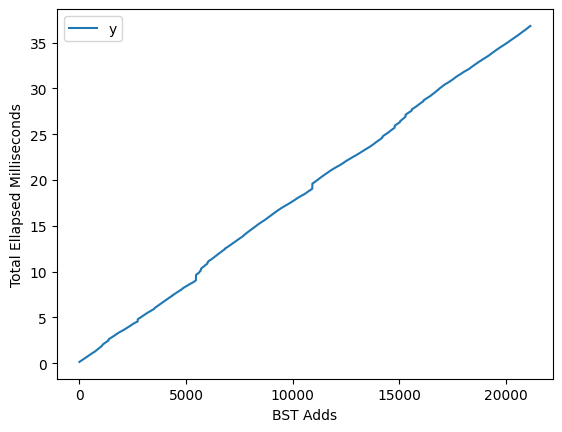

In [9]:
#Q6
bank = loans.Bank("University of Wisconsin Credit Union")
tree = search.BST()
time_beginning = time.time()
loans_added = 0
time_add = {}
for loan in bank.loans:
    tree.add(loan.interest_rate, loan)
    loans_added += 1
    time_after_add = time.time()
    total_time = (time_after_add - time_beginning) * 1000
    time_add.update({loans_added: total_time})

x = []
y = []
for key in time_add:
    x.append(key)
    y.append(time_add[key])
data = {'x': x, 'y': y}
df = pd.DataFrame(data)
ax = df.plot.line(x='x',y='y')
ax.set_xlabel("BST Adds")
ax.set_ylabel("Total Ellapsed Milliseconds")

Text(0, 0.5, 'Milliseconds')

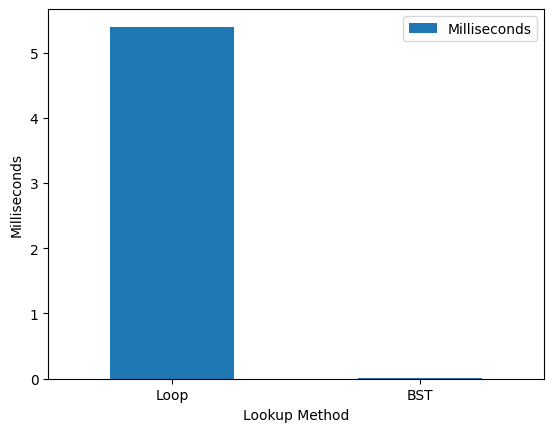

In [10]:
#Q7
count = 0
t0 = time.time()
for loan in bank.loans:
    if loan.interest_rate == -1:
        count += 1

t1 = time.time()
t_loop = (t1 - t0) * 1000
t0 = time.time()
#len(tree[-1])
t1 = time.time()
t_BST = (t1 - t0) * 1000
data = {'Lookup Method': ['Loop', 'BST'], 'Milliseconds': [t_loop, t_BST]}
df = pd.DataFrame(data)
ax = df.plot.bar(x='Lookup Method', y='Milliseconds', rot=0)
ax.set_ylabel('Milliseconds')

Text(0, 0.5, 'Number of Applicants')

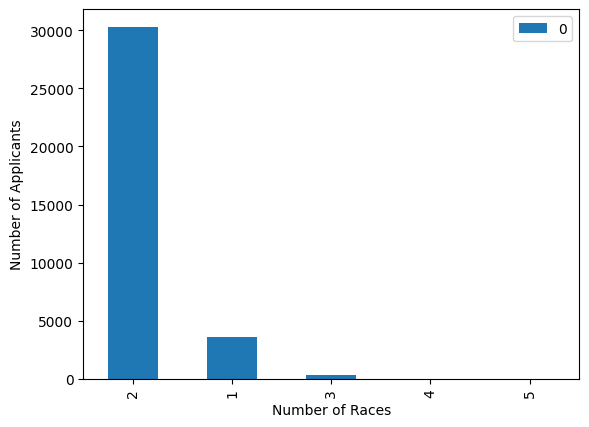

In [11]:
#Q8
num_races = {}
for i in bank.loans:
    for a in i.applicants:
        if len(a.race) in num_races.keys():
            num_races[len(a.race)] += 1
        else:
            num_races.update({len(a.race): 1})
df = pd.DataFrame.from_dict(num_races, orient='index')
ax = df.plot.bar()
ax.set_xlabel('Number of Races')
ax.set_ylabel('Number of Applicants')

In [12]:
#Q9
def count_leaf(node):
    if node == None:
        return 0
    if node.left == None and node.right == None:
        return 1
    else:
        return count_leaf(node.left) + count_leaf(node.right)
count_leaf(tree.root)

9

In [13]:
#Q10

#algorithm modified from https://www.geeksforgeeks.org/find-the-largest-three-elements-in-an-array/
def find_largest_four(lst):
    max1, max2, max3, max4 = float('-inf'), float('-inf'), float('-inf'), float('-inf')
    for num in lst:
        if num.interest_rate > max1:
            max4, max3, max2, max1 = max3, max2, max1, num.interest_rate
        elif num.interest_rate > max2:
            max4, max3, max2 = max3, max2, num.interest_rate
        elif num.interest_rate > max3:
            max4, max3 = max3, num.interest_rate
        elif num.interest_rate > max4:
            max4 = num.interest_rate
    return [max1, max2, max3, max4]

find_largest_four(bank.loans)[3]

5.99